In [0]:
Framename = ('clinicaltrial_2021_csv')

In [0]:
dbutils.fs.ls("/FileStore/tables/")

Out[2]: [FileInfo(path='dbfs:/FileStore/tables/Terminal_Saved_Output', name='Terminal_Saved_Output', size=1543303, modificationTime=1646093034000),
 FileInfo(path='dbfs:/FileStore/tables/accounts-1.zip', name='accounts-1.zip', size=5297592, modificationTime=1645611705000),
 FileInfo(path='dbfs:/FileStore/tables/accounts-2.zip', name='accounts-2.zip', size=5297592, modificationTime=1645611767000),
 FileInfo(path='dbfs:/FileStore/tables/accounts-3.zip', name='accounts-3.zip', size=5297592, modificationTime=1645612123000),
 FileInfo(path='dbfs:/FileStore/tables/accounts-4.zip', name='accounts-4.zip', size=5297592, modificationTime=1647454857000),
 FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1645023254000),
 FileInfo(path='dbfs:/FileStore/tables/character_counting.ipynb', name='character_counting.ipynb', size=25386, modificationTime=1646062059000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019.csv', name='clinicaltria

In [0]:
data = spark.read.options(header = True).options(delimiter = "|").csv("/FileStore/tables/" + Framename)

In [0]:
display(data)

Id,Sponsor,Status,Start,Completion,Type,Submission,Conditions,Interventions
NCT02758028,The University of Hong Kong,Recruiting,Aug 2005,Nov 2021,Interventional,Apr 2016,null,null
NCT02751957,Duke University,Completed,Jul 2016,Jul 2020,Interventional,Apr 2016,"Autistic Disorder,Autism Spectrum Disorder",null
NCT02758483,Universidade Federal do Rio de Janeiro,Completed,Mar 2017,Jan 2018,Interventional,Apr 2016,Diabetes Mellitus,null
NCT02759848,Istanbul Medeniyet University,Completed,Jan 2012,Dec 2014,Observational,May 2016,"Tuberculosis,Lung Diseases,Pulmonary Disease",null
NCT02758860,University of Roma La Sapienza,"Active, not recruiting",Jun 2016,Sep 2020,Observational [Patient Registry],Apr 2016,"Diverticular Diseases,Diverticulum,Diverticulosis",null
NCT02757209,Consorzio Futuro in Ricerca,Completed,Apr 2016,Jan 2018,Interventional,Apr 2016,Asthma,"Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate"
NCT02752438,Ankara University,Unknown status,May 2016,Jul 2017,Observational [Patient Registry],Apr 2016,Hypoventilation,null
NCT02753543,Ruijin Hospital,Unknown status,Nov 2015,Nov 2019,Interventional,Apr 2016,Lymphoma,null
NCT02757508,Washington University School of Medicine,Completed,Mar 2016,Jul 2017,Interventional,Apr 2016,null,Vitamins
NCT02753530,Orphazyme,Completed,Aug 2017,Jan 2021,Interventional,Apr 2016,Myositis,null


In [0]:
data.distinct().count()

Out[5]: 387261

In [0]:
#QUESTION 2

In [0]:
kype = data.select("Type").groupBy("Type")\
.count().sort('count',ascending = False)

In [0]:
kype.display()

Type,count
Interventional,301472
Observational,77540
Observational [Patient Registry],8180
Expanded Access,69


In [0]:
#QUESTION 3

In [0]:
from pyspark.sql.functions import split, col, explode
cond = data.select(explode(split(col('Conditions'),","))).withColumnRenamed("col","Conditions").groupBy("Conditions").count().sort("count",ascending = False)

In [0]:
cond.display(5)

Conditions,count
Carcinoma,13389
Diabetes Mellitus,11080
Neoplasms,9371
Breast Neoplasms,8640
Syndrome,8032
Leukemia,5904
Lung Neoplasms,5598
COVID-19,5567
Lymphoma,5395
Hypertension,5364


In [0]:
#QUESTION 4

In [0]:
dbutils.fs.ls("/FileStore/tables")

Out[13]: [FileInfo(path='dbfs:/FileStore/tables/Terminal_Saved_Output', name='Terminal_Saved_Output', size=1543303, modificationTime=1646093034000),
 FileInfo(path='dbfs:/FileStore/tables/accounts-1.zip', name='accounts-1.zip', size=5297592, modificationTime=1645611705000),
 FileInfo(path='dbfs:/FileStore/tables/accounts-2.zip', name='accounts-2.zip', size=5297592, modificationTime=1645611767000),
 FileInfo(path='dbfs:/FileStore/tables/accounts-3.zip', name='accounts-3.zip', size=5297592, modificationTime=1645612123000),
 FileInfo(path='dbfs:/FileStore/tables/accounts-4.zip', name='accounts-4.zip', size=5297592, modificationTime=1647454857000),
 FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1645023254000),
 FileInfo(path='dbfs:/FileStore/tables/character_counting.ipynb', name='character_counting.ipynb', size=25386, modificationTime=1646062059000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019.csv', name='clinicaltri

In [0]:
mesh = ('FileStore/tables/mesh.csv')

In [0]:
dataF =  spark.read.options(header = True).options(delimiter = ",").csv("/FileStore/tables/mesh.csv")

In [0]:
from pyspark.sql.functions import substring
dataF = dataF.select('term',substring('tree',1,3)).withColumnRenamed('substring(tree, 1, 3)','tree')

In [0]:
#renamed the columns as term and tree
dataF = dataF.withColumnRenamed('substring(tree, 1, 3)','tree')

In [0]:
dataF.display(5)

term,tree
Calcimycin,D03
A-23187,D03
Temefos,D02
Temefos,D02
Temefos,D02
Abate,D02
Abate,D02
Abate,D02
Difos,D02
Difos,D02


In [0]:
Ndata =dataF.join(cond,dataF.term==cond.Conditions,"inner").select("tree","count").groupBy("tree")\
.sum("count").withColumnRenamed("sum(count)","count").sort("count",ascending=False)

In [0]:
Ndata.display()

tree,count
C04,143994
C23,136079
C01,106674
C14,94523
C10,92310
C06,85646
C08,70720
C13,42599
C18,41276
C12,40161


In [0]:
Pharmaccy =  spark.read.options(header = True).options(delimiter = ",").csv("/FileStore/tables/pharma.csv")

In [0]:
Phar = Pharmaccy.select("Parent_Company")
Phar.display()

Parent_Company
Abbott Laboratories
AbbVie
AbbVie
Abbott Laboratories
Johnson & Johnson
Abbott Laboratories
Abbott Laboratories
Johnson & Johnson
Johnson & Johnson
Abbott Laboratories


In [0]:
pharmac = data.select("Sponsor")
pharmac.display()

Sponsor
The University of Hong Kong
Duke University
Universidade Federal do Rio de Janeiro
Istanbul Medeniyet University
University of Roma La Sapienza
Consorzio Futuro in Ricerca
Ankara University
Ruijin Hospital
Washington University School of Medicine
Orphazyme


In [0]:
farm = pharmac.join(Phar,Phar.Parent_Company == pharmac.Sponsor,"left")
farm.display()

Sponsor,Parent_Company
The University of Hong Kong,null
Duke University,null
Universidade Federal do Rio de Janeiro,null
Istanbul Medeniyet University,null
University of Roma La Sapienza,null
Consorzio Futuro in Ricerca,null
Ankara University,null
Ruijin Hospital,null
Washington University School of Medicine,null
Orphazyme,null


In [0]:
farm = farm.filter(farm.Parent_Company.isNull()).groupBy('Sponsor').count().sort('count',ascending = False)
farm.show()                                                                         
                                                                          
                                                     

+--------------------+-----+
|             Sponsor|count|
+--------------------+-----+
|National Cancer I...| 3218|
|M.D. Anderson Can...| 2414|
|Assistance Publiq...| 2369|
|         Mayo Clinic| 2300|
|Merck Sharp & Doh...| 2243|
|   Assiut University| 2154|
|Novartis Pharmace...| 2088|
|Massachusetts Gen...| 1971|
|    Cairo University| 1928|
|   Hoffmann-La Roche| 1828|
|National Taiwan U...| 1814|
|Eli Lilly and Com...| 1641|
|Memorial Sloan Ke...| 1604|
|University of Cal...| 1598|
|National Institut...| 1582|
|     Duke University| 1581|
| Stanford University| 1552|
|               Bayer| 1469|
|Seoul National Un...| 1465|
|Washington Univer...| 1374|
+--------------------+-----+
only showing top 20 rows



In [0]:
final = data.select('Completion').filter(data.Status == 'Completed')

In [0]:
from pyspark.sql.functions import substring
free = final.select(substring('Completion',1,3).alias('month'),substring('Completion',5,4).alias('year'))\
.filter(substring('Completion',5,4)==2021).groupBy('month').count()
free.display()

month,count
Oct,187
Sep,528
Aug,700
May,984
Jun,1094
Feb,934
Mar,1227
Jan,1131
Apr,967
Jul,819


In [0]:
#VISUALISATION

In [0]:
free = free.withColumnRenamed('(Completion,1,3)','month')

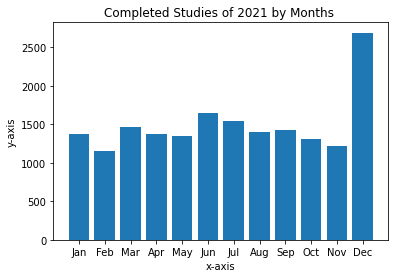

In [0]:
import pandas as py
X = free.toPandas()['month'].values.tolist()
Y = free.toPandas()['count'].values.tolist()
import matplotlib.pyplot as plt
x = [ "Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
y = [1368,1149,1470,1368,1342,1647,1547,1406,1421,1310,1223,2690]
 # to plot the graph
plt.bar(x, y) 
plt.title("Completed Studies of 2021 by Months ")
plt.ylabel("y-axis")
plt.xlabel("x-axis")
plt.show()